# Why is Macbeth so different from other most famous comedies and tragedies of Shakespeare?

## Zhonghui Gu

Instructions: 

1. Replace "yourname" in the title of this notebook, and "your name here" in the markdown above, with your name.
2. Create a title for your final project. Preferably, this should indicate what your argument is. Replace "your title here" in the markdown above with your title.
3. Write your paper, and include everything (your prose in Markdown, your code, and your figures) in this notebook. Don't include the texts you're analyzing. If you generated your corpus programmatically (i.e. using corpus-db.org or some fancy Python), maybe you'll want to include that in the code somewhere here. Your notebook file (`.ipynb`) will be the only thing you turn in.  
3. Annotate your code using markdown cells, and/or comment lines (lines beginning with `#`), explaining why you're doing what you're doing. If one of your functions takes certain parameters, for instance, why did you choose those parameters? 
3. Prune your notebook of unnecessary or redundant code. Run all your code again, to show that it works as-is. Each code cell should have a number in it, and an output, if applicable. 
4. Proofread well! If English is not your first language, you might consider making an appointment with [the Writing Center](https://slc.berkeley.edu/appointment-service) to get help polishing the language of your paper. At minimum, you'll want to use a spell checker and maybe even an automatic grammar-checking service like [Grammerly](https://www.grammarly.com/). (Of course, you now have the tools to analyze your own writing, if you want. You can get your markdown text into Python by adapting the word count function below, and use it to analyze your most frequent n-grams!) You might also consider organizing a mutual editing session with classmates.
4. Ensure that you have no more than three plots (figures). One figure with several subplots is OK, and counts as one figure.
4. If you quote from or reference literary works, or works of criticirm, provide in-text parenthetical citations. Then create a bibliographic entry for each work you cite, and include them at the end. Unless your discipline requires a different format, use [MLA Style](https://style.mla.org/) as the format for your bibliography, and title it "works cited." 
4. Replace the value of the `filename` variable in the wordcount cell below to the name your file. (E.g., `Jonathan-Final.ipynb`.) Then run the wordcount cell. Ensure that your paper is between 1000 and 2000 words, so it doesn't give you any errors or warnings.  
5. Optionally, and for a 5% bonus, add your notebook to the `/Projects` directory of the course repository, and submit it as a pull request. Your project will then become public. 
6. Email me your `.ipynb` file: jonathan.reeve@columbia.edu. Please email me only your `.ipynb` file, alone and uncompressed. Please don't respond to an existing email, but create a new email, with the subject: `Yourname: Final Project`, replacing `yourname` with your name. Do this regardless of whether you also submit a pull request. 
7. Celebrate! You've finished your final project, and gloriously completed _Introduction to Computational Literary Analysis_!

## Hypothesis

  Four Great Tragedies (including _Hamlet_, _Othello_, _Macbeth_, _KingLear_) and the Comedies (including _As You Like It_, _The Merchant of Venice_, _A Midsummer Night's Dream_, _Twelfth Night or What You Will_) are the most famous works of William Shakespeare.The four comedies were written during 1595-1600, while the four tragedies were during 1601-1605. Among all the novels, Macbeth is the unique one，the reason of which I suppose is its lack on romance. So, the article will concentrate on proving that Macbeth is special, its lack on romance and other interesting finding.

## Test

In [1]:
# Import all your libraries here, and only here, please.
import nltk
from nltk import word_tokenize, sent_tokenize, pos_tag, pos_tag_sents, ngrams
from nltk.corpus import brown
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline
# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

C:\Users\59103\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
C:\Users\59103\Anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
import requests
import json

In [3]:
response = requests.get('http://corpus-db.org/api/author/Shakespeare, William')

Get all the works of Shakespeare.

In [4]:
response.ok

True

In [5]:
parsed = json.loads(response.text)
[(item['id'],item['title']) for item in parsed]

[('100.0', 'The Complete Works of William Shakespeare'),
 ('1041.0', "Shakespeare's Sonnets"),
 ('1045.0', 'Venus and Adonis'),
 ('1100.0', 'The First Part of Henry the Sixth'),
 ('1101.0', 'The Second Part of King Henry the Sixth'),
 ('1102.0', 'The Third Part of King Henry the Sixth'),
 ('1103.0', 'King Richard III'),
 ('1104.0', 'The Comedy of Errors'),
 ('1105.0', 'The Sonnets'),
 ('1106.0', 'The Tragedy of Titus Andronicus'),
 ('1107.0', 'The Taming of the Shrew'),
 ('1108.0', 'The Two Gentlemen of Verona'),
 ('1109.0', "Love's Labour's Lost"),
 ('1110.0', 'King John'),
 ('1111.0', 'King Richard the Second'),
 ('1112.0', 'The Tragedy of Romeo and Juliet'),
 ('1113.0', "A Midsummer Night's Dream"),
 ('1114.0', 'The Merchant of Venice'),
 ('1115.0', 'The First Part of King Henry the Fourth'),
 ('1116.0', 'The Merry Wives of Windsor'),
 ('1117.0', 'Second Part of King Henry IV'),
 ('1118.0', 'Much Ado about Nothing'),
 ('1119.0', 'The Life of King Henry the Fifth'),
 ('1120.0', 'The 

In [6]:
tragedyIDs = [str(float(bookID)) for bookID in [1787, 2267, 6975, 2266]]
comedyIDs = [str(float(bookID)) for bookID in [1113, 1121, 2247, 1114]]

Find out the number of Four Comedies and Four Tragedies of ShakeSpeare.

In [7]:
def getFullText(bookID): 
    response = requests.get('http://corpus-db.org/api/id/' + bookID + '/fulltext')
    if response.ok: 
        print('Got full text for ' + bookID)
        parsed = json.loads(response.text)
        if len(parsed)>0 and 'text' in parsed[0]: 
            return parsed[0]['text']
    else: 
        print('Response came back bad: ' + response.status)

The fuction is aimed to output the eight books.

In [8]:
tragedyTexts= [getFullText(bookID).lower() for bookID in tragedyIDs]
comedyTexts= [getFullText(bookID).lower() for bookID in comedyIDs]

Got full text for 1787.0
Got full text for 2267.0
Got full text for 6975.0
Got full text for 2266.0
Got full text for 1113.0
Got full text for 1121.0
Got full text for 2247.0
Got full text for 1114.0


In [9]:
tragedyTokens= [word_tokenize(text) for text in tragedyTexts]
comedyTokens= [word_tokenize(text) for text in comedyTexts]

Tokenize texts in order to get more accurater lengths.

In [10]:
tragedyLen= [len(text) for text in tragedyTokens]
tragedyLen

[40583, 35327, 21983, 31500]

In [11]:
comedyLen= [len(text) for text in comedyTokens]
comedyLen

[21689, 28411, 26174, 27434]

In [12]:
label= ['Hamlet','Othello','Macbeth','KingLear','MidsummerNightDream','AsYouLikeIt','TwelfthNight','MerchantofVenice']

In [13]:
tfidf = TfidfVectorizer(use_idf=False, max_features=800)
pca = PCA(2)
allTf = tfidf.fit_transform(tragedyTexts+ comedyTexts).todense()

PCA is a tool to transform the numerous dimensions(these dimensions represent the difference among these texts) into two dimensions, so that we can find out difference from the plot directly.

In [14]:
allTf

matrix([[0.        , 0.0071552 , 0.00755271, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00670338, 0.00335169, ..., 0.        , 0.        ,
         0.        ],
        [0.05944971, 0.        , 0.        , ..., 0.02447929, 0.15824115,
         0.02710208],
        ...,
        [0.        , 0.00392619, 0.00280442, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00611268, 0.00061127, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00572026, 0.00457621, ..., 0.        , 0.        ,
         0.        ]])

In [15]:
pcaOut = pca.fit_transform(allTf)
pcaOut 

array([[-1.73733903e-01, -7.95488626e-02],
       [-1.62500275e-01,  1.97052221e-01],
       [ 1.18559025e+00, -2.79215157e-04],
       [-1.75925791e-01,  1.34907077e-01],
       [-1.62330917e-01, -1.69442526e-01],
       [-1.67778979e-01, -1.13129428e-01],
       [-1.67807738e-01,  1.45570621e-01],
       [-1.75512644e-01, -1.15129887e-01]])

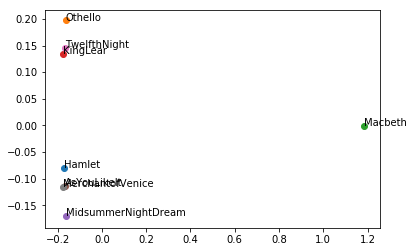

In [16]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(label[i], (xs[i], ys[i]))

Using the PCA make the plot. Initially, I thought the texts would be completely divded into the 'tragedy' group and the 'comedy' group. But things  go out of my expectation. Hamlet appears in the 'tragedy' group, while Twelfth Night appears in the 'comedy' group. Though there exists some mixture, these texts except Macbeth share similarity in one dimension. What's more interesting is that Macbeth is so different from all the other texts. In another way, it can be considered that ShakeSpeare wrote Macbeth with a different writing style So, the final project will focus on these problems.

As I suppose, the diversity of words and average numbers of words in each sentence are two important indicators to the writing style.

In [17]:
def typeTokenratio(text):
    textTokens= word_tokenize(text)
    typeTokens= set(textTokens)
    return len(typeTokens)/len(textTokens)

The function is created to get the diversity of words of different texts. The number returned being higher means the diversity of words is higher. 

In [18]:
tragedyTTR= [typeTokenratio(text) for text in tragedyTexts]
tragedyTTR

[0.12012418993174481,
 0.11911569054830583,
 0.18941909657462586,
 0.13596825396825396]

The third number is the word diversity of Macbeth, which is obviously higher than others. Therefore, _Macbeth_ is in a writing which is a little different from the others and may have something distinctive to express.

In [19]:
comedyTTR= [typeTokenratio(text) for text in comedyTexts]
comedyTTR

[0.13882613306284292,
 0.1163633803808384,
 0.13532513181019332,
 0.12171028650579573]

In [20]:
def averageSentLength(texts):
    averSentLengths=[]
    for text in texts:
         averSentLengths.append(len(word_tokenize(text))/len(sent_tokenize(text)))
    return(averSentLengths)

It's a function for calculating the average word numbers in each sentence.

In [21]:
averageSentLength(tragedyTexts)

[10.424608271256101, 13.088921822897369, 14.714190093708167, 14.77485928705441]

In [22]:
averageSentLength(comedyTexts)

[13.010797840431914, 12.151839178785286, 15.29748684979544, 13.813695871097684]

It seems that there's nothing strange on average word numbers.

In [23]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [24]:
romanceWord = brown.words(categories='romance')

At first, I assumed that the comedies tend to have more romantic contents. As a result, exploiting the romantic contents in the texts might be helpful to judge whether a text is a comedy or a tragedy. So, I choose "Brown" dictionary to get the words related to romance. Then pick out all the forms of verb, adjective, adverbial, nouns in the list, and remove all forms of 'be' as common words（the frequency of the common words is similar by the same author and can hardly represent romance）. Afterwards, count the word frequency of all the texts and 'romance' list, and make the data list. Finally, sum all the words' frequency which appear in the 'romance' list in each text, and make the bar chart.

In [25]:
romanceWords = [word.lower() for word in romanceWord]

In [26]:
romancePos= pos_tag(romanceWords)
romancePos[:100]

[('they', 'PRP'),
 ('neither', 'DT'),
 ('liked', 'VBD'),
 ('nor', 'CC'),
 ('disliked', 'VBD'),
 ('the', 'DT'),
 ('old', 'JJ'),
 ('man', 'NN'),
 ('.', '.'),
 ('to', 'TO'),
 ('them', 'PRP'),
 ('he', 'PRP'),
 ('could', 'MD'),
 ('have', 'VB'),
 ('been', 'VBN'),
 ('the', 'DT'),
 ('broken', 'NN'),
 ('bell', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('church', 'NN'),
 ('tower', 'NN'),
 ('which', 'WDT'),
 ('rang', 'NN'),
 ('before', 'IN'),
 ('and', 'CC'),
 ('after', 'IN'),
 ('mass', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('at', 'IN'),
 ('noon', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('at', 'IN'),
 ('six', 'CD'),
 ('each', 'DT'),
 ('evening', 'NN'),
 ('--', ':'),
 ('its', 'PRP$'),
 ('tone', 'NN'),
 (',', ','),
 ('repetitive', 'JJ'),
 (',', ','),
 ('monotonous', 'JJ'),
 (',', ','),
 ('never', 'RB'),
 ('breaking', 'VBG'),
 ('the', 'DT'),
 ('boredom', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('streets', 'NNS'),
 ('.', '.'),
 ('the', 'DT'),
 ('old', 'JJ'),
 ('man', 'NN'),
 ('was', 'VBD'),
 ('unimportant', '

In [27]:
romancePartwords=[]
for pair in romancePos:
    if pair[1] in ['NNS','NN','NNP','NNPS','VB','VBD','VBG','VBN','VBP','VBZ','VBT','RB','RBR','RBS','JJ','JJR','JJS'] and pair[0] not in ['i', 'was', 'be', 'were', 'been', 'is', 'are']:
            romancePartwords.append(pair[0])

Because of the imperfection of 'pos_tag', 'i' should be removed by hand.

In [28]:
len(set(romancePartwords))

7731

Count how many unrepeated words there are in the 'romance' list.

In [29]:
HamletCounts=Counter(tragedyTokens[0]) 
OthelloCounts=Counter(tragedyTokens[1]) 
MacbethCounts=Counter(tragedyTokens[2])
KingLearCounts=Counter(tragedyTokens[3])
MidNightDreamCounts=Counter(comedyTokens[0]) 
AsYouLikeItCounts=Counter(comedyTokens[1]) 
TwelfthCounts=Counter(comedyTokens[2]) 
MerchantVeniceCounts=Counter(comedyTokens[3]) 
romanceCounts=Counter(romancePartwords) 

In [30]:
df = pd.DataFrame([HamletCounts,OthelloCounts,MacbethCounts,KingLearCounts,MidNightDreamCounts,AsYouLikeItCounts,TwelfthCounts,MerchantVeniceCounts,romanceCounts], 
                  index=['Hamlet','Othello','Macbeth','KingLear','MidNightDream','AsYouLikeIt','Twelfth','MerchantVenice','Romance']).T.fillna(0)

In [31]:
df['HamletF']= df['Hamlet']/len(tragedyTokens[0])
df['OthelloF']= df['Othello']/len(tragedyTokens[1])
df['MacbethF']= df['Macbeth']/len(tragedyTokens[2])
df['KingLearF']= df['KingLear']/len(tragedyTokens[3])
df['MidNightDreamF']= df['MidNightDream']/len(comedyTokens[0])
df['AsYouLikeItF']= df['AsYouLikeIt']/len(comedyTokens[1])
df['TwelfthF']= df['Twelfth']/len(comedyTokens[2])
df['MerchantVeniceF']= df['MerchantVenice']/len(comedyTokens[3])
df['RomanceF']= df['Romance']/len(romancePartwords)

In [32]:
df.sort_values('RomanceF',ascending=False)[:7731]

,Hamlet,Othello,Macbeth,KingLear,MidNightDream,AsYouLikeIt,Twelfth,MerchantVenice,Romance,HamletF,OthelloF,MacbethF,KingLearF,MidNightDreamF,AsYouLikeItF,TwelfthF,MerchantVeniceF,RomanceF
had,44.0,61.0,0.0,38.0,18.0,43.0,34.0,42.0,695.0,0.001084,0.001727,0.000000,0.001206,0.000830,0.001513,0.001299,0.001531,0.022503
said,14.0,16.0,0.0,8.0,4.0,13.0,6.0,2.0,331.0,0.000345,0.000453,0.000000,0.000254,0.000184,0.000458,0.000229,0.000073,0.010717
not,342.0,353.0,2.0,276.0,184.0,276.0,248.0,237.0,273.0,0.008427,0.009992,0.000091,0.008762,0.008484,0.009715,0.009475,0.008639,0.008839
have,183.0,16.0,0.0,16.0,98.0,168.0,16.0,161.0,264.0,0.004509,0.000453,0.000000,0.000508,0.004518,0.005913,0.000611,0.005869,0.008548
so,194.0,165.0,190.0,129.0,115.0,133.0,134.0,116.0,159.0,0.004780,0.004671,0.008643,0.004095,0.005302,0.004681,0.005120,0.004228,0.005148
then,65.0,101.0,0.0,107.0,48.0,65.0,92.0,63.0,143.0,0.001602,0.002859,0.000000,0.003397,0.002213,0.002288,0.003515,0.002296,0.004630
just,2.0,1.0,0.0,1.0,0.0,5.0,1.0,2.0,128.0,0.000049,0.000028,0.000000,0.000032,0.000000,0.000176,0.000038,0.000073,0.004144
did,66.0,73.0,0.0,26.0,37.0,54.0,49.0,48.0,127.0,0.001626,0.002066,0.000000,0.000825,0.001706,0.001901,0.001872,0.001750,0.004112
back,9.0,0.0,0.0,0.0,10.0,5.0,0.0,5.0,123.0,0.000222,0.000000,0.000000,0.000000,0.000461,0.000176,0.000000,0.000182,0.003983
do,150.0,222.0,0.0,112.0,106.0,122.0,106.0,113.0,121.0,0.003696,0.006284,0.000000,0.003556,0.004887,0.004294,0.004050,0.004119,0.003918


In [33]:
def RomanWordCountF(counts):
    countSum=0
    for word in set(romancePartwords):
        countSum+= df[counts][word]
    return countSum

Create a function in order to sum all the words' frequency which appear in the 'romance' list in each text.

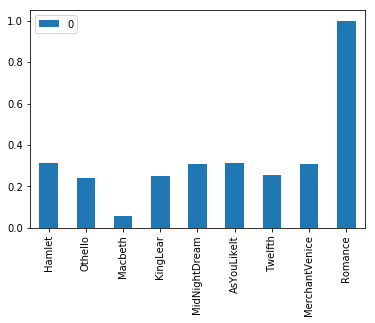

In [34]:
pd.DataFrame([RomanWordCountF('HamletF'),RomanWordCountF('OthelloF'),RomanWordCountF('MacbethF'),RomanWordCountF('KingLearF'),RomanWordCountF('MidNightDreamF'),RomanWordCountF('AsYouLikeItF'),RomanWordCountF('TwelfthF'),RomanWordCountF('MerchantVeniceF'),RomanWordCountF('RomanceF')]
            ,index= ['Hamlet','Othello','Macbeth','KingLear','MidNightDream','AsYouLikeIt','Twelfth','MerchantVenice','Romance'] ).fillna(0).plot(kind= 'bar')

From the chart, it's evident that the sum of _Macbeth_ is the lowest.

## Analysis 

### 1.Writing period

  First, the writing period is an important cause as I suppose. The strange phenomena appear at some time like transition point. 
The first 'transition point' is 1600, which is a point when Shakespeare just finished his four most famous comedies in 1595-1600, and turned to work on his four great tragedies in 1601-1605. At this point when Enclosure proceeded more vehemently and the social contradictions got more serios, Shakespeare started to write tragedies to indicate social problems. As the result, _Hamlet_ and _Twelfth Night_ near the transition point may have mixed and chaotic style.

So is _Macbeth_, as the last one of the four great tragedies, it may be at another transition point where Shakespeare changed himself.

### 2. Romance content

From the last chart, it's clear that _Macbeth_ have the fewest contents about romance among all these tragedies and comedies. As far as I'm concerned, because of the necessary existence of love in comedies, it's common that comedies have more romance content than tragedies. However, that's not to say that tragedies don't need romance content. As Chinese great author Lu Xun said, "Tragedy is to destroy all the pretty things for people to see." Consequently, creating certain amount of romance in the novel and then breaking it can help make the tragedy more serious. As is shown from the last bar chart, except the particular case of _Hamlet_ and _Twelfth Night_, these three tragedies have fewer romance contents than these three comedies. The counterexample _Hamlet_ and _Twelfth Night_ can be attributed to writing style transition, as well.


Among the four great tragedies in chronological order, _Hamlet_, _Othello_, and _King Lear_ emphasize on expressing humanity, which needs to create something romantic in novels and then destroy it to make the tragedies better. Then, on account that Shakespeare felt disappointed after appearance of many social contradictions, _Macbeth_ tend to criticize the dictatorship and social problems. As a result, its expression about humanity is less. But, _Macbeth_ and _King Lear_ share some similarity like struggle for power, what the reason is in specifi article content that make them so different from each other in romance contents? 

In my opinion, first, _King Lear_ still utilize a large amount of words to potray the affection between Lear and Cordelia, directly and indirectly, which can import a lot of romance words. While _Macbeth_ is lack of contents about affection and love. Second, _Macbeth_ relies on depicting the inner activity, especially confliction to shape the feature of Macbeth and get close to audience. And Macbeth's inner activity is dark in most of the novel. Nevertheless, King Lear's feature is molded by outer confliction between characters' emotion to influence audience. The existence of positive emotion can raise the amount of romance word. Last but not the least, the feature of Fool in _King Lear_ is significant in the novel, and he is a typical romantic feature who is not afraid of great power.And there's no such an mportant role in _Macbeth_.



## Conclusion

_Macbeth_ is really unique among these novels, and its romance content accounts for less part in whole texts than others. 

### Wordcount Function

Please replace `Yourname-Final.ipynb` with the filename of this notebook. For instance, if my name is Jonathan, and I've renamed this notebook to `Jonathan-Final.ipynb`, I'd change `filename = 'Yourname-Final.ipynb'` below to `filename = 'Jonathan-Final.ipynb`. 

In [35]:
filename = 'Zhonghui Gu-Final.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open('Zhonghui Gu-Final.ipynb', encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1063
